<center>
    <img src="https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/msp_header.png?raw=1">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta



# Filters

Using frequency responses and the z-Transform, we can now analyse and design more general filters than just the running average or the running difference.
Applying a filter has the effect of multiplying the frequency domain description of a signal $ {X \left( \omega \right) } {}$ with the frequency response or transfer function of a filter $H\left(\omega\right)$ to obtain the filter output $Y\left(\omega\right)$:

$$Y\left(\omega\right)=X\left(\omega\right)\cdot H\left(\omega\right)$$

In the time (or space) domain we get the corresponding operation by taking the inverse Discrete Time Fourier Transform. Remember that a multiplication in the frequency domain becomes a **convolution** in the time domain:
$$
 {y \left( n \right) =x \left( n \right) *h \left( n \right) = \sum _ { {m= -  \infty } }  ^{ { \infty } }  {x \left( n - m \right) h \left( m \right) } } {}
$$

This is what we already saw for the example of the running average low pass filter with the matrix formulation!<br>
This is now the more general formulation to obtain filters, which we can now use to design filters.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/BhyxN_INkNw" frameborder="0" allow="accelerometer;
    encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Ideal Low Pass Filter

**Example:** An **ideal** low pass filter has a constant pass band, with constant magnitude of 1, and a constant stop band, with a magnitude of 0! This is also called a “brick wall filter”, because of the similarity of the magnitude of the frequency response with a brick.

<center>
    <img src="https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/Ideal-Low-pass-filter.png?raw=1">
</center>

We can describe an ideal low pass filter using the following equations:

$$H\left(e^{j\omega}\right)=\left\{
                \begin{array}{ll}
                  1 \quad \textrm{for} \quad -\omega_c < \omega < +\omega_c\\
                  0 \quad \textrm{elsewhere}
                \end{array}
              \right.
$$
              
Applying the inverse DTFT, will give us the analytical solution of its ideal impulse response:

$$h\left(n\right)=\dfrac{1}{2\pi} \cdot \int_{\omega=-\omega_c}^{\omega_c} H\left(e^{j\omega}\right)e^{jn\omega} d\omega$$

$$ h\left(n\right)=\dfrac{1}{2\pi} \cdot  \int_{\omega=-\omega_c}^{+\omega_c} 1 \cdot e^{jn\omega} d\omega = \dfrac{1}{2\pi} \cdot \left(\dfrac{e^{j \cdot \omega_c \cdot n }}{j \cdot n} - \dfrac{e^{-j \cdot \omega_c \cdot n }}{j \cdot n} \right )$$


From Trigonometry and Complex Exponentials we have $ sin\left(x\right)= \dfrac{e^{jx}-e^{-jx}}{2j} $ (Euler's Formula) and substituting we get:

$$ h\left(n\right) = \dfrac{sin\left(\omega_c \cdot n\right)}{\pi \cdot n} $$

This expression leads to an indetermination of $\dfrac{0}{0}$ when $n=0$, therefore using L'Hôpital we have:

$$h\left(n\right)=\dfrac{\omega_c}{\pi}\quad \textrm{for} \quad n=0$$

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Lhyr82B6Pro" frameborder="0" allow="accelerometer;
    encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We can also calculate the inverse DTFT using Sympy:

In [1]:
# Imports
from sympy import symbols, Integral, simplify, pi, E, I

In [2]:
# Define symbols
wc, w = symbols('\omega_c \omega')
n = symbols('n', integer=True)

In [3]:
h=(1/(2*pi))*Integral(E**(I*n*w),(w,-wc,wc))
display(h)
h.doit()

Integral(exp(I*\omega*n), (\omega, -\omega_c, \omega_c))/(2*pi)

Piecewise((-I*exp(I*\omega_c*n)/n + I*exp(-I*\omega_c*n)/n, Ne(n, 0)), (2*\omega_c, True))/(2*pi)

In [4]:
simplify(h.doit())

Piecewise((sin(\omega_c*n)/(pi*n), (n > 0) | (n < 0)), (\omega_c/pi, True))

- We can see that the resulting impulse response is infinite and non-causal. For practical applications we need a finite and causal system.
- To make the impulse response causal, we can add a delay to the impulse response to avoid values for n < 0, meaning that it starts at time 0.
- To make the impulse response finite, we can truncate the impulse response to a limited length L.


**This shows that the impulse response of an ideal low pass filter is not practically implementable, and we can get only an approximation of an ideal filter.**

We have now very easily designed this filter in the **frequency domain** (this is our filter goal). We just need to know the pass band edge and the magnitudes of pass band and stop band. But usually we implement and compute our filters in the time or space domain (at least for short filters this is more efficient to implement).

How do we obtain a corresponding **impulse response**? First we also need to specify the **phase**, because the frequency response consists of 2 parts, the magnitude and the phase. There are filters where we want to specify the phase ( as in all-pass filters), and there are filters where we don’t care much about the phase, as in our low pass example. If we don’t care about the phase, we can give it an arbitrary value, like 0. But there we find that we will get non-causal filters, so it makes sense to **add a delay** to make it causal (meaning that it starts at time 0).

In that case we have a **linear phase** corresponding to that **delay**. Why is a delay linear phase?

### Delay

We can write a **delay by m sample** points as multiplying the signal with $z^{-m}$ in the z-domain:

$$
 {H \left( z \right) \cdot z^{{ - m} } = \sum_ { {n=0} } ^ { { \infty } }  {h \left( n \right) z ^{ { - n - m} } } = \sum _ { {n'=m} }  ^ { { \infty } }  {h \left( n' - m \right) z ^ { { - n'} } } } {}
$$
with the index substitution $n'=n+m$, for a causal system. This is the z-Transform of the delayed signal $h\left(n-m\right)$, with a delay of m samples.

**In summary:** A **delay** of m samples in the time domain corresponds to a **multiplication** with $z^{-m}$ in the z-domain.

Observe that this delay can also be written as a convolution with the following impulse response s(n) in the time domain:

$$
{s \left( n \right) = \left [\underbrace {0,0, .  .  .  ,} _{\text{m-zeros} } 1 \right ]} {}
$$
(meaning s(n)=1 for n=m, and 0 else),
as convolution sum:

$$
x\left(n\right)*s\left(n\right)=\sum_{l=0}^{m} x\left(n-l\right) \cdot s\left(l\right)=x\left(n-m\right)
$$
(indeed a delay).
Taking the z-Transform obviously again results in

$$ {S \left( z \right) = \sum _ {{n=0} }  ^ {{ \infty } }  {s\left( n \right) z ^ { { - n} } } =z ^ {{ - m} } } {}
$$
Important to remember: A z-transform element of $z^{-m}$ corresponds to a time-domain **delay of m samples**! (Because this is one of the fundamentals of multirate signal processing)

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/YjAZUpLzIAk" frameborder="0" allow="accelerometer;
    encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Python Example**: Delay

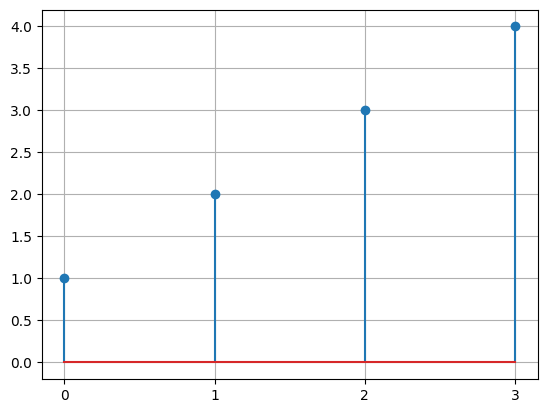

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# Signal
x=range(1,5)
plt.figure()
plt.stem(x)
plt.xticks(np.arange(0, 4, step=1))
plt.grid();

<ipython-input-7-1e3840955609>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(s, use_line_collection=True)


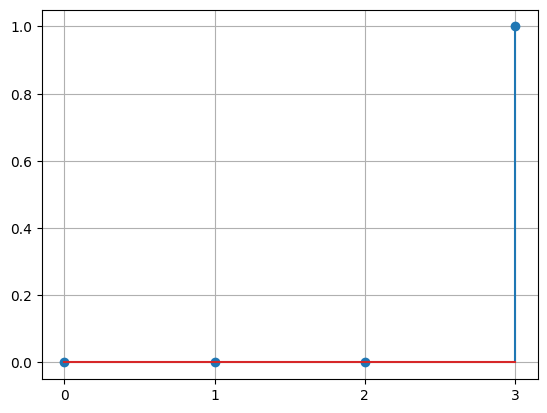

In [7]:
# Delay (shift) Operator
s=np.array([0,0,0,1])
plt.figure()
plt.stem(s, use_line_collection=True)
plt.xticks(np.arange(0, 4, step=1))
plt.grid();

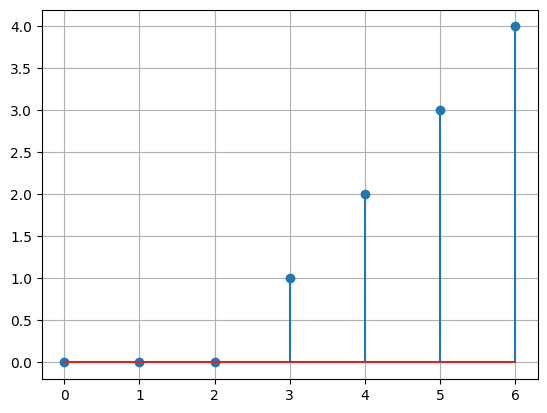

In [9]:
# If we filter (convolve) our signal with this shift operator, we get a delayed signal:
plt.figure()
sx=np.convolve(s,x)
plt.stem(sx)
plt.grid()

Here you can observe a delay by 3 samples.


We can now apply our trick to obtain the **frequency response** of the delay, we replace z by $e^{j\omega}$:
$$S\left(\omega\right)=e^{-jm\omega}$$
The magnitude of it is obviously 1, and the phase is $-m\cdot \omega$, so it is linear with a slope of -m!

In Python plot the frequency response of our shift operator above:

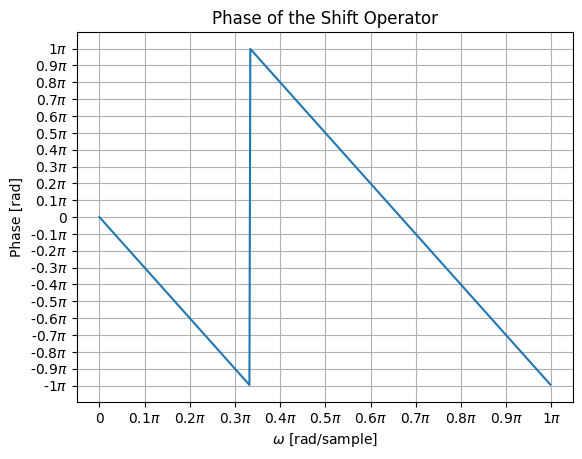

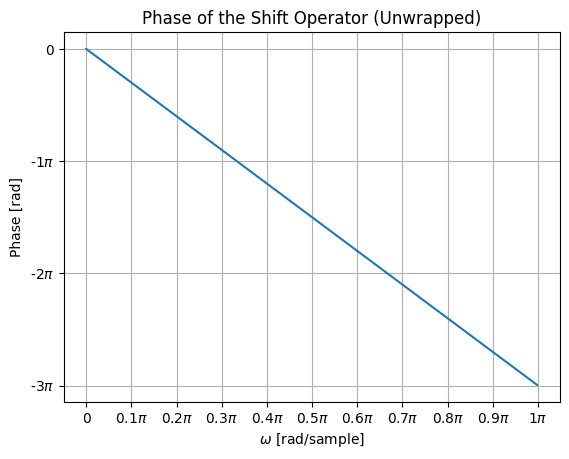

In [10]:
import scipy.signal as signal
from matplotlib.ticker import FuncFormatter, MultipleLocator
omega, H= signal.freqz(s)
plt.figure()
plt.plot(omega, np.angle(H))
plt.title('Phase of the Shift Operator')
plt.xlabel('$\omega$ [rad/sample]')
plt.ylabel('Phase [rad]')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.1*np.pi))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=0.1*np.pi))
plt.grid()

plt.figure()
plt.plot(omega, np.unwrap(np.angle(H)))
plt.title('Phase of the Shift Operator (Unwrapped)')
plt.xlabel('$\omega$ [rad/sample]')
plt.ylabel('Phase [rad]')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.1*np.pi))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
plt.grid()
